**IMOPRTING LIBRARIES**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV

**READING DATA USING PANDAS**

In [2]:
data = pd.read_csv('prod_.csv')
data.head(15)

,product,year,expiri duretion in years,month,no. of new products bought,no of products left for selling,no. of products sold,prodects left,no of products to be bought,demand %
0,colgate,2019,2.0,1,60,60,46,0,46.0,76.666667
1,colgate,2019,2.0,2,32,46,38,14,24.0,118.750000
2,colgate,2019,2.0,3,40,62,47,22,25.0,117.500000
3,colgate,2019,2.0,4,36,51,40,15,25.0,111.111111
4,colgate,2019,2.0,5,56,67,58,11,47.0,103.571429
5,colgate,2019,2.0,6,41,50,39,9,30.0,95.121951
6,colgate,2019,2.0,7,58,69,51,11,40.0,87.931034
7,colgate,2019,2.0,8,31,47,47,16,31.0,151.612903
8,colgate,2019,2.0,9,100,100,56,0,56.0,56.000000
9,colgate,2019,2.0,10,0,44,44,44,44.0,44.000000


In [3]:
data['product'].unique()

array(['colgate', 'gemini  tea powder', 'suger', 'freedom sunflower oil',
       'life boy soap', 'santoor'], dtype=object)

**ENCODING DATA**

In [4]:
ohe = OneHotEncoder()
ohe.fit(data[['product']])
ct=make_column_transformer((OneHotEncoder(),[0]),remainder='passthrough')

**DENPENDENT AND INDIPENDENT VARIABLES**

In [5]:
x = data.iloc[:,[0,1,3]].values
y = data.iloc[:, [6]].values

In [6]:
o=data.iloc[36:68,[2]]
o['expiri duretion in years'].unique()

array([0.6, 1. ])

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [8]:
print(x)

[['colgate' 2019 1]
 ['colgate' 2019 2]
 ['colgate' 2019 3]
 ['colgate' 2019 4]
 ['colgate' 2019 5]
 ['colgate' 2019 6]
 ['colgate' 2019 7]
 ['colgate' 2019 8]
 ['colgate' 2019 9]
 ['colgate' 2019 10]
 ['colgate' 2019 11]
 ['colgate' 2019 12]
 ['gemini  tea powder' 2019 1]
 ['gemini  tea powder' 2019 2]
 ['gemini  tea powder' 2019 3]
 ['gemini  tea powder' 2019 4]
 ['gemini  tea powder' 2019 5]
 ['gemini  tea powder' 2019 6]
 ['gemini  tea powder' 2019 7]
 ['gemini  tea powder' 2019 8]
 ['gemini  tea powder' 2019 9]
 ['gemini  tea powder' 2019 10]
 ['gemini  tea powder' 2019 11]
 ['gemini  tea powder' 2019 12]
 ['suger' 2019 1]
 ['suger' 2019 2]
 ['suger' 2019 3]
 ['suger' 2019 4]
 ['suger' 2019 5]
 ['suger' 2019 6]
 ['suger' 2019 7]
 ['suger' 2019 8]
 ['suger' 2019 9]
 ['suger' 2019 10]
 ['suger' 2019 11]
 ['suger' 2019 12]
 ['freedom sunflower oil' 2019 1]
 ['freedom sunflower oil' 2019 2]
 ['freedom sunflower oil' 2019 3]
 ['freedom sunflower oil' 2019 4]
 ['freedom sunflower oil' 2

**DIVIDING THE DATA INTO TRAINING AND TESTING SET**

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.175, random_state=0)

In [11]:
x_test

array([['suger', 2020, 1],
       ['life boy soap', 2021, 12],
       ['suger', 2021, 2],
       ['santoor', 2020, 5],
       ['freedom sunflower oil', 2021, 3],
       ['colgate', 2021, 7],
       ['freedom sunflower oil', 2019, 9],
       ['life boy soap', 2021, 7],
       ['santoor', 2019, 5],
       ['colgate', 2019, 9],
       ['suger', 2020, 12],
       ['freedom sunflower oil', 2019, 2],
       ['colgate', 2019, 6],
       ['colgate', 2021, 2],
       ['santoor', 2019, 4],
       ['freedom sunflower oil', 2021, 5],
       ['santoor', 2020, 8],
       ['gemini  tea powder', 2022, 3],
       ['gemini  tea powder', 2022, 4],
       ['gemini  tea powder', 2020, 7],
       ['freedom sunflower oil', 2020, 3],
       ['colgate', 2020, 3],
       ['life boy soap', 2020, 6],
       ['colgate', 2020, 4],
       ['colgate', 2021, 12],
       ['gemini  tea powder', 2019, 1],
       ['gemini  tea powder', 2021, 3],
       ['gemini  tea powder', 2021, 5],
       ['life boy soap', 2020, 5],
  

In [20]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

# **REGRESSION MODELS**

# Support Vector Machine

In [21]:
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.svm import SVC
svm=SVC()
svm.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [22]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']}
est=GridSearchCV(svm,param_grid=param_grid,scoring='r2',cv=5)


In [25]:
from pandas.core.algorithms import mode
pipeSVM=make_pipeline(ct,est)
pipeSVM.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(), [0])])),
                ('gridsearchcv',
                 GridSearchCV(cv=5, estimator=SVC(),
                              param_grid={'C': [0.1, 1, 10, 100, 1000],
                                          'gamma': [1, 0.1, 0.01, 0.001,
                                                    0.0001],
                                          'kernel': ['rbf']},
                              scoring='r2'))])

In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
scoring = ['precision_macro', 'recall_macro']
scores = cross_val_score(pipeSVM, x, y, scoring='r2')
print(scores)

[0.8892937  0.70303015 0.9228269  0.82491259 0.77125228]


In [32]:
y_pred= pipeSVM.predict(x_test)
score = r2_score(y_pred,y_test)
score

0.9526413375722814

# Linear Regression

In [33]:
lr = LinearRegression()
lr.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [34]:
from pandas.core.algorithms import mode
from sklearn import pipeline
pipeLR=make_pipeline(ct,lr)
pipeLR.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(), [0])])),
                ('linearregression', LinearRegression())])

In [35]:
y_pred= pipeLR.predict(x_test)
score = r2_score(y_pred,y_test)
score

0.9653430574119966

# Linear Regression using **RIGDE** and **LASO**

In [37]:
from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': 'deprecated',
 'positive': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}

here we are trying out different alpha and solver value

In [38]:
param_grid = {
    'alpha': [0.1, 1.0, 10.0, 100.0],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
}
estRIDGE=GridSearchCV(ridge,param_grid=param_grid,scoring='r2',cv=5)

In [39]:
pipeRIDGE=make_pipeline(ct,estRIDGE)
pipeRIDGE.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(), [0])])),
                ('gridsearchcv',
                 GridSearchCV(cv=5, estimator=Ridge(),
                              param_grid={'alpha': [0.1, 1.0, 10.0, 100.0],
                                          'solver': ['auto', 'svd', 'cholesky',
                                                     'lsqr', 'sparse_cg', 'sag',
                                                     'saga']},
                              scoring='r2'))])

In [46]:
estRIDGE.best_params_

{'alpha': 1.0, 'solver': 'lsqr'}

In [40]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
scoring = ['precision_macro', 'recall_macro']
scores = cross_val_score(pipeRIDGE, x, y, scoring='r2')
print(scores)

[0.8701323  0.54741397 0.93417797 0.96916535 0.88637841]


In [41]:
y_pred= pipeRIDGE.predict(x_test)
score = r2_score(y_pred,y_test)
score

0.9645861866125512

**using laso regression**

In [42]:
from sklearn.linear_model import Lasso
lasso=Lasso()
lasso.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'normalize': 'deprecated',
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [47]:
param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0, 100.0],
    'max_iter': [1000, 5000, 10000]
}
estLASSO=GridSearchCV(lasso,param_grid=param_grid,scoring='r2',cv=5)

In [48]:
pipeLASSO=make_pipeline(ct,estLASSO)
pipeLASSO.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(), [0])])),
                ('gridsearchcv',
                 GridSearchCV(cv=5, estimator=Lasso(),
                              param_grid={'alpha': [0.01, 0.1, 1.0, 10.0,
                                                    100.0],
                                          'max_iter': [1000, 5000, 10000]},
                              scoring='r2'))])

In [49]:
estLASSO.best_params_

{'alpha': 0.1, 'max_iter': 1000}

In [50]:
y_pred= pipeLASSO.predict(x_test)
score = r2_score(y_pred,y_test)
score

0.9655277832302975

# DecisionTreeRegressor

In [24]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import fbeta_score, make_scorer
dt = DecisionTreeRegressor()
parameters = {'max_depth':(1,2,3,4,5,6,7,8,9,10)}
scoring_function = make_scorer(fbeta_score, beta=2)
dtg = GridSearchCV(dt, param_grid=parameters, scoring=scoring_function)
piped = make_pipeline(ct,sc,dtg)
piped.fit(x_train,y_train)
y_pred=piped.predict(x_test)
r2_score(y_test,y_pred)

0.9045437732782886

# RandomForestRegressor

In [28]:
from sklearn.ensemble import RandomForestRegressor
estimator = RandomForestRegressor()

piper = make_pipeline(ct,estimator)
piper.fit(x_train, y_train)
y_pred= piper.predict(x_test)
r2_score(y_test, y_pred)

0.9692382393639462

In [29]:
piper.predict([['suger',2023,1]])

array([408.94])

In [30]:
k=data['product'].unique()
colgate1=[]
for j in range(1,13):
    colgate1.append(float(piper.predict([['colgate',2022,j]])))

C:\Users\Chinnnolla Koteshwar\AppData\Local\Temp\ipykernel_16324\1775140384.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  colgate1.append(float(piper.predict([['colgate',2022,j]])))
C:\Users\Chinnnolla Koteshwar\AppData\Local\Temp\ipykernel_16324\1775140384.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  colgate1.append(float(piper.predict([['colgate',2022,j]])))
C:\Users\Chinnnolla Koteshwar\AppData\Local\Temp\ipykernel_16324\1775140384.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this ope

In [31]:
k

array(['colgate', 'gemini  tea powder', 'suger', 'freedom sunflower oil',
       'life boy soap', 'santoor'], dtype=object)

In [32]:
p1=[]
p2=[]
p3=[]
p4=[]
p5=[]
p6=[]
for i in range(0,6):
  for j in range(1,13):
    if i==0:
      p1.append(float(piper.predict([[k[i],2022,j]])))
    if i==1:
      p2.append(float(piper.predict([[k[i],2022,j]])))
    if i==2:
      p3.append(float(piper.predict([[k[i],2022,j]])))
    if i==3:
      p4.append(float(piper.predict([[k[i],2022,j]])))
    if i==4:
      p5.append(float(piper.predict([[k[i],2022,j]])))
    if i==5:
      p6.append(float(piper.predict([[k[i],2022,j]])))
    


C:\Users\Chinnnolla Koteshwar\AppData\Local\Temp\ipykernel_16324\2863260073.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  p1.append(float(piper.predict([[k[i],2022,j]])))
C:\Users\Chinnnolla Koteshwar\AppData\Local\Temp\ipykernel_16324\2863260073.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  p1.append(float(piper.predict([[k[i],2022,j]])))
C:\Users\Chinnnolla Koteshwar\AppData\Local\Temp\ipykernel_16324\2863260073.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated

In [33]:
p2

[40.91,
 42.89,
 45.92,
 39.84,
 35.46,
 37.18,
 37.78,
 38.52,
 38.5,
 37.52,
 37.18,
 37.98]

# month vs demand graph

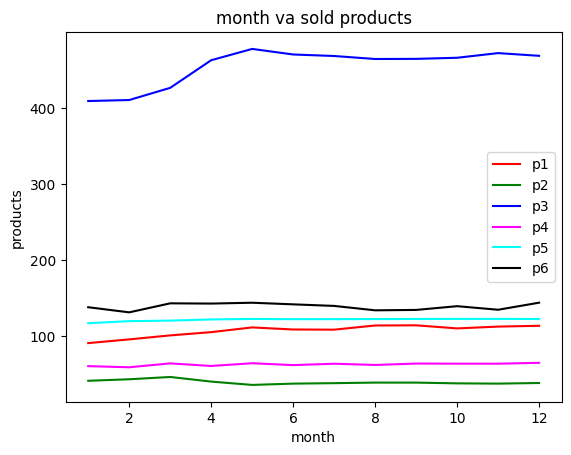

In [34]:
month=data.iloc[:12,[3]].values
plt.plot(month,p1,c='red',label='p1')
plt.plot(month,p2,c='green',label='p2')
plt.plot(month,p3,c='blue',label='p3')
plt.plot(month,p4,c='magenta',label='p4')
plt.plot(month,p5,c='cyan',label='p5')
plt.plot(month,p6,c='black',label='p6')
plt.title('month va sold products')
plt.xlabel('month')
plt.ylabel('products')
plt.legend()
plt.show()

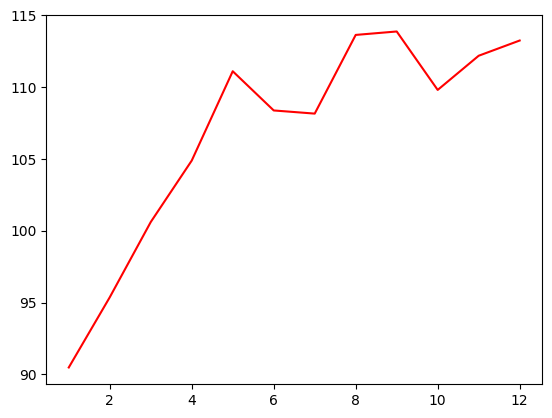

In [35]:
month=data.iloc[:12,[3]].values
plt.plot(month,colgate1,c='red',label='p1')
plt.show()

In [36]:
k

array(['colgate', 'gemini  tea powder', 'suger', 'freedom sunflower oil',
       'life boy soap', 'santoor'], dtype=object)

In [37]:
m=0
n=36
p=[]
for i in range(0,6):
    k[i]=data.iloc[m:n,[0,1,3,6]]
    k[i]=pd.DataFrame(k[i])
    k[i]=k[i].rename(columns={0:"product",1:'year',2:'month',3:'sold product'})
    m= n
    n=n+41


In [38]:
b=k[0]['month'].unique().tolist()

In [39]:
def to2D(twoD):
    oneD = []
    for i in twoD:
        oneD.extend(i)
    return(oneD)

In [41]:

to2D(k[0].iloc[24:36,[3]].values.tolist())

[74, 86, 89, 95, 112, 98, 99, 115, 112, 98, 110, 109]

# pie chart

In [ ]:
fig, ax = plt.subplots()
ax.pie(to2D(k[0].iloc[:12,[3]].values.tolist()),labels=b,autopct='%1.1f%%')
ax.set_title('colgate 2019')
fig,ax2 = plt.subplots()
ax2.pie(to2D(k[0].iloc[12:24,[3]].values.tolist()),labels=b,autopct='%1.1f%%')
ax2.set_title('colgate 2020')
fig,ax3 = plt.subplots()
ax3.pie(to2D(k[0].iloc[24:36,[3]].values.tolist()),labels=b,autopct='%1.1f%%')
ax3.set_title('colgate 2021')

# Bar graph

In [43]:
# for i in range(0,6):
#   k[i]=k[i].pivot(index='month', columns = 'year',values = 'no. of products sold')

In [ ]:
# for i in range(0,6):
#   k[i].plot(kind='bar',figsize=(10,6))
#   plt.xlabel('month')
#   plt.ylabel('sold product')

In [ ]:
# colgate=data.iloc[:36,[0,1,2,5]].values
# colgate=pd.DataFrame(colgate)
# colgate=colgate.rename(columns={0:"product",1:'year',2:'month',3:'sold product'})
# colgate

In [ ]:
# gta= data.iloc[36:72,[0,1,2,5]].values
# gta=pd.DataFrame(gta)
# gta=gta.rename(columns={0:"product",1:'year',2:'month',3:'sold product'})
# gta

# xgboost

In [37]:
!pip install xgboost

In [38]:
import xgboost as xg
xgb_r = xg.XGBRegressor(objective ='reg:linear',n_estimators = 10, seed = 123)
pipex = make_pipeline(ct,xgb_r)
pipex.fit(x_train, y_train)
y_pred= pipex.predict(x_test)
r2_score(y_test, y_pred)

ModuleNotFoundError: No module named 'xgboost'

In [48]:
pipex.predict([['colgate',2022,3]])

array([101.200615], dtype=float32)

In [49]:
k=data['product'].unique()
k[1]

'gemini  tea powder'

# month vs sold prodects

# pickle

In [ ]:
import pickle
pickle.dump(piper,open('dpprod.pkl','wb'))

In [13]:
a=[i+j for i in range(5) for j in range(5) if i+j < 6]

In [11]:
a = [i + j if i + j < 6 else -1 for i in range(5) for j in range(5)]

In [15]:
a=[[k+i for k in range(5)] for i in range(5)]
a

[[0, 1, 2, 3, 4],
 [1, 2, 3, 4, 5],
 [2, 3, 4, 5, 6],
 [3, 4, 5, 6, 7],
 [4, 5, 6, 7, 8]]

In [22]:
s=(lambda x,y: x + y)
a = [s(i,6) for i in range(5)]
a

[6, 7, 8, 9, 10]